## Boosting Algorithms Comparison: CatBoost, AdaBoost, XGBoost

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")



In [16]:
# Import models
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from catboost import CatBoostRegressor



### Load Dataset

In [17]:
df = pd.read_csv('StudentsPerformance.csv')

In [18]:
# Create target and features
X = df.drop(columns=['math score'])
y = df['math score']



In [19]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(exclude='object').columns.tolist()



### Preprocessing pipelines

In [20]:
categorical_transformer = OneHotEncoder(drop='first', sparse=False)
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols)
    ])



### Define models

Training AdaBoost...


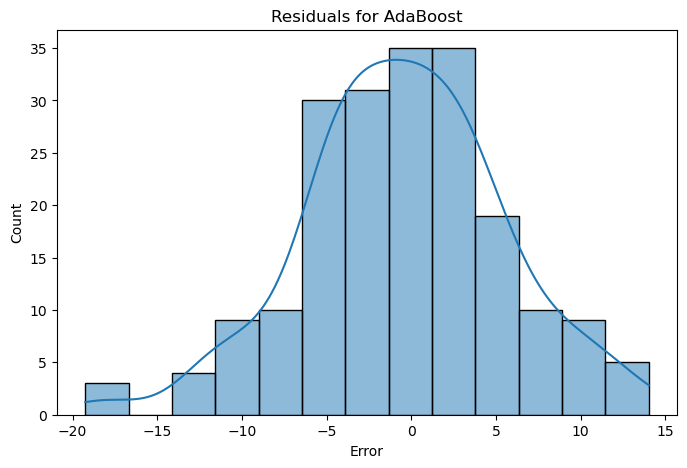

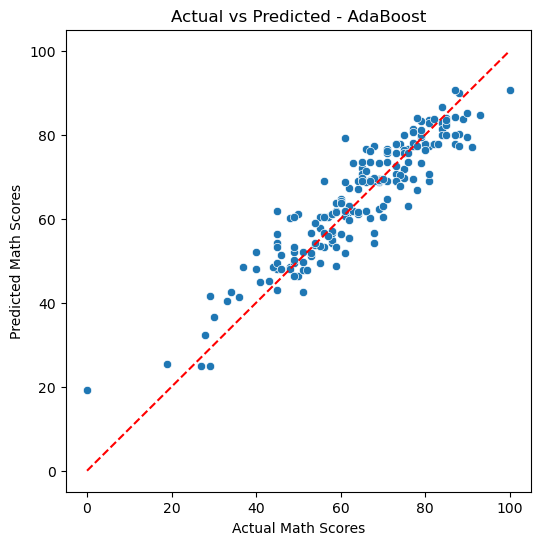

AdaBoost Cross-Validated R^2: 0.8282
--------------------------------------------------
Training XGBoost...


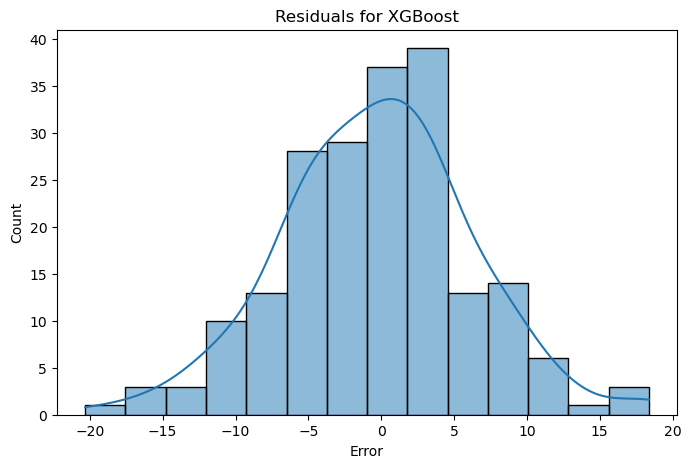

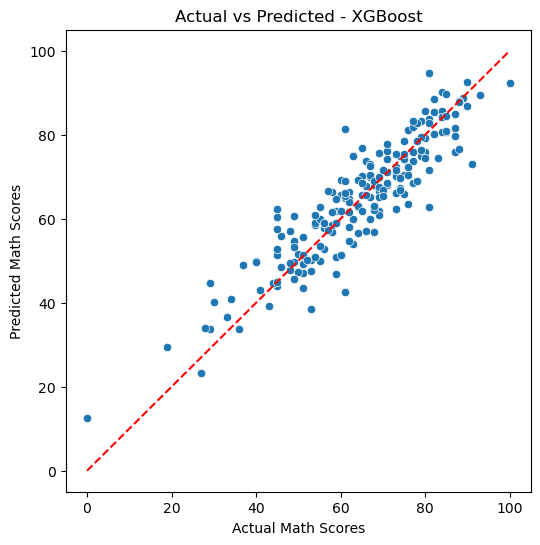

XGBoost Cross-Validated R^2: 0.8082
--------------------------------------------------
Training CatBoost...


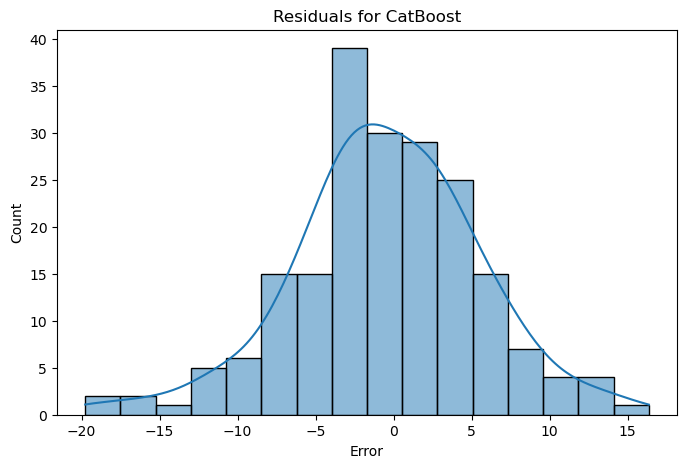

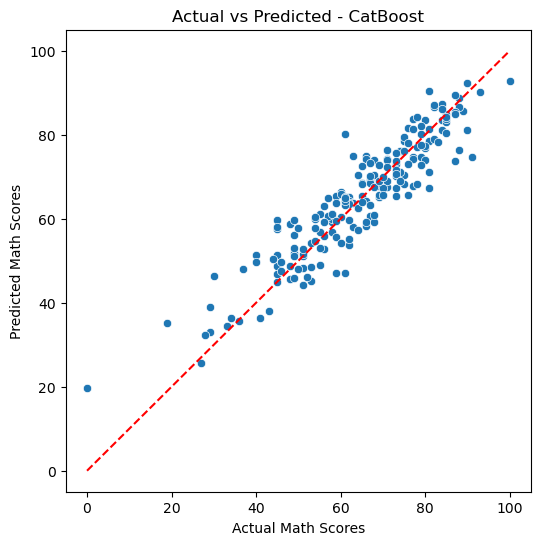

CatBoost Cross-Validated R^2: 0.8430
--------------------------------------------------

📊 Performance Summary:

                R2       MAE        MSE
AdaBoost  0.854058  4.645947  35.513341
XGBoost   0.825046  5.078543  42.573138
CatBoost  0.851083  4.633818  36.237295


In [21]:

models = {
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, verbosity=0),
    'CatBoost': CatBoostRegressor(verbose=0, random_state=42)
}

results = {}

for name, reg in models.items():
    print(f"Training {name}...")
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', reg)
    ])
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    pipe.fit(X_train, y_train)
    
    # Prediction & Evaluation
    y_pred = pipe.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    results[name] = {'R2': r2, 'MAE': mae, 'MSE': mse}
    
    # Residuals Plot
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 5))
    sns.histplot(residuals, kde=True)
    plt.title(f'Residuals for {name}')
    plt.xlabel('Error')
    plt.show()
    
    # Actual vs Predicted Plot
    plt.figure(figsize=(6,6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
    plt.xlabel('Actual Math Scores')
    plt.ylabel('Predicted Math Scores')
    plt.title(f'Actual vs Predicted - {name}')
    plt.show()
    
    # Cross-validation
    scores = cross_val_score(pipe, X, y, scoring='r2', cv=10)
    print(f"{name} Cross-Validated R^2: {np.mean(scores):.4f}")
    print('-'*50)

# Display Summary
summary_df = pd.DataFrame(results).T
print("""\n📊 Performance Summary:\n""")
print(summary_df)